In [69]:

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12

import numpy as np 
import pandas as pd

## Elastic constants

In [70]:
elastic_constants = pd.read_csv('results/elastic_constants_0b3-medium_alex.csv')
pivot = elastic_constants.pivot(index="element", columns="model", values=["alat", "C11", "C12", "C44"])
pivot = pivot.loc[["W", "Mo", "Nb"]]
pivot

alat                                                     C11  \
model       DFT mace-mp0b3-medium mace-mp0b3-medium_ft   mp-alex    DFT   
element                                                                   
W        3.1854          3.203581             3.190725  3.174713  516.0   
Mo       3.1630          3.182678                  NaN  3.151221  477.0   
Nb       3.3220          3.320881                  NaN  3.317026  250.0   

                                                              C12  \
model   mace-mp0b3-medium mace-mp0b3-medium_ft     mp-alex    DFT   
element                                                             
W              356.199562           545.869611  587.521555  198.0   
Mo             251.599363                  NaN  517.357714  155.0   
Nb             197.141562                  NaN  234.920872  135.0   

                                                              C44  \
model   mace-mp0b3-medium mace-mp0b3-medium_ft     mp-alex    DFT   
element                                                             
W              247.895315           203.943536  258.657299  140.0   
Mo             189.756553                  NaN  203.500909  111.0   
Nb             114.333973                  NaN  120.754315   21.0   

                                                            
model   mace-mp0b3-medium mace-mp0b3-medium_ft     mp-alex  
element                                                     
W               82.448768           151.235386  143.152639  
Mo              48.045707                  NaN   86.904605  
Nb               2.324474                  NaN  -15.886924

In [71]:
print(pivot.round({'alat': 3, 'C11': 1, 'C12': 1, 'C44': 1}).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
 & \multicolumn{4}{r}{alat} & \multicolumn{4}{r}{C11} & \multicolumn{4}{r}{C12} & \multicolumn{4}{r}{C44} \\
model & DFT & mace-mp0b3-medium & mace-mp0b3-medium_ft & mp-alex & DFT & mace-mp0b3-medium & mace-mp0b3-medium_ft & mp-alex & DFT & mace-mp0b3-medium & mace-mp0b3-medium_ft & mp-alex & DFT & mace-mp0b3-medium & mace-mp0b3-medium_ft & mp-alex \\
element &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
W & 3.185400 & 3.203581 & 3.190725 & 3.174713 & 516.000000 & 356.199562 & 545.869611 & 587.521555 & 198.000000 & 247.895315 & 203.943536 & 258.657299 & 140.000000 & 82.448768 & 151.235386 & 143.152639 \\
Mo & 3.163000 & 3.182678 & NaN & 3.151221 & 477.000000 & 251.599363 & NaN & 517.357714 & 155.000000 & 189.756553 & NaN & 203.500909 & 111.000000 & 48.045707 & NaN & 86.904605 \\
Nb & 3.322000 & 3.320881 & NaN & 3.317026 & 250.000000 & 197.141562 & NaN & 234.920872 & 135.000000 & 114.333973 & NaN & 120.754315 & 21.000000 & 2.3244

In [72]:
pivot["alat"].round(4)

model,DFT,mace-mp0b3-medium,mace-mp0b3-medium_ft,mp-alex
element,,,,
W,3.1854,3.2036,3.1907,3.1747
Mo,3.1630,3.1827,NaN,3.1512
Nb,3.3220,3.3209,NaN,3.3170


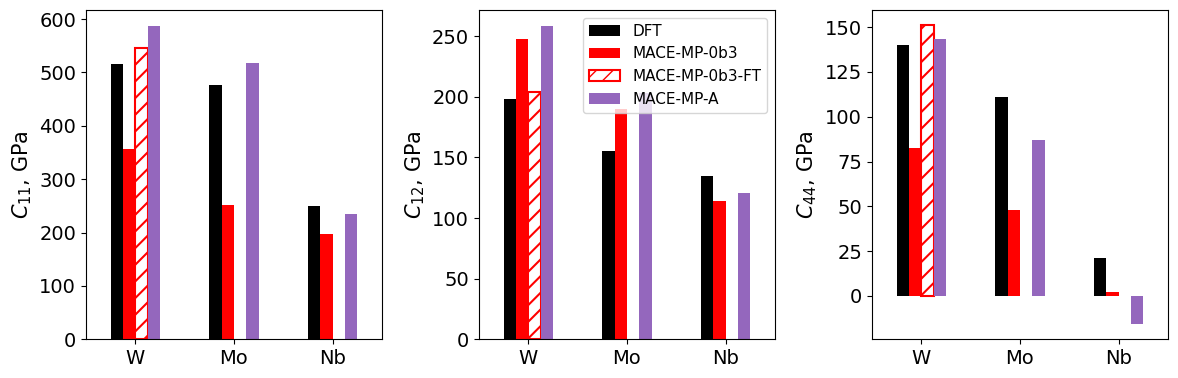

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
import pandas as pd
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

pivot.plot.bar(y="C11", rot=0, color=["k", "r", "r", "C4"], ax=axes[0], legend=False)
pivot.plot.bar(y="C12", rot=0, color=["k", "r", "r", "C4"], ax=axes[1], legend=False)
pivot.plot.bar(y="C44", rot=0, color=["k", "r", "r", "C4"], ax=axes[2], legend=False)

for ax in axes:
    for i in [6]:
        color = ax.patches[i].get_facecolor()
        ax.patches[i].set_linewidth(1.5)
        ax.patches[i].set_hatch("//")
        ax.patches[i].set_hatch_linewidth(1.5)
        ax.patches[i].set_fill(None)
        ax.patches[i].set_edgecolor(color)


axes[0].set_ylabel("$C_{11}$, GPa", fontsize=15)
axes[1].set_ylabel("$C_{12}$, GPa", fontsize=15)
axes[2].set_ylabel("$C_{44}$, GPa", fontsize=15)


axes[1].legend(loc="upper right", labels=["DFT", "MACE-MP-0b3", "MACE-MP-0b3-FT", "MACE-MP-A"], fontsize=11)
for ax in axes:
    ax.set_xlabel("")

fig.tight_layout()
fig.savefig("figures/elastic_constants_0b3_alex.pdf")
fig.savefig("figures/elastic_constants_0b3_alex.svg")

## Energy vs volume

In [74]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


def plot_eos(potential, label, axes=None): 
    colors=["r", "b"]
    if axes is None:
        fig, axes = plt.subplots(ncols=3, figsize=(12, 4.1), sharey=True)

    for ax, symbol in zip(axes, ["W", "Mo", "Nb"]):

        eos = pd.read_csv(f"results/eos_{potential}_{symbol}.csv")
        dft_eos = pd.read_csv(f"data/eos_DFT_{symbol}.csv")
        dft_eos.plot(x="V/atom_BCC", y="Delta_BCC_E", ax=ax, style=f"ko", legend=False)
        dft_eos.plot(x="V/atom_FCC", y="Delta_FCC_E", ax=ax, style=f"k^", legend=False)
        #dft_eos.plot(x="V/atom_A15", y="Delta_A15_E", ax=ax, style="C2^", legend=False)

        eos.plot(x="V/atom", y=["Delta_BCC_E", "Delta_FCC_E"], #"Delta_A15_E"], 
                label=["BCC", "FCC"], #"A15"], 
                ylabel="Energy (eV/atom)", legend=False, ax=ax, lw=2., color=colors)

        potential_2 = "mace-alex-main-branch"
        eos = pd.read_csv(f"results/eos_{potential_2}_{symbol}.csv")

        eos.plot(x="V/atom", y=["Delta_BCC_E", "Delta_FCC_E"], #"Delta_A15_E"], 
                label=["BCC", "FCC"], #"A15"], 
                ylabel="Energy (eV/atom)", legend=False, ax=ax, lw=2., color=["C4", "g"])

        ax.set_xlim(13, 21)
        ax.set_ylim(-0.1, 0.95)
        ax.set_ylabel("$\Delta$E (eV/atom)")
        ax.set_title(f"{symbol}")
        ax.set_xlabel("Volume (A$^3$/atom)")

    first_legend_lines = [axes[1].plot([], [], marker='None', color="r", linestyle='-')[0],
                        axes[1].plot([], [], marker='None', color="b", linestyle='-')[0],
                        axes[1].plot([], [], marker='None', color='C2', linestyle='-')[0]]
    first_legend = axes[1].legend(first_legend_lines, ['BCC', 'FCC'],# 'A15'], 
                                  title=label, loc="upper center")

    # Create a list of Line2D objects that represent the markers in the second legend
    second_legend_lines = [axes[1].plot([], [], marker='o', color="k", linestyle='None')[0],
                           axes[1].plot([], [], marker='^', color="k", linestyle='None')[0],
                           axes[1].plot([], [], marker='^', color='C2', linestyle='None')[0]]


    # Add the second legend to the plot
    second_legend = axes[1].legend(second_legend_lines, ['BCC', 'FCC'], #'A15'],
                                   title="DFT", loc="lower right", fontsize=13)
    # Add the first legend back to the plot
    axes[1].add_artist(first_legend)
    axes[1].add_artist(second_legend)
    fig = axes[0].get_figure()

    W_ft_eos = pd.read_csv("results/eos_A13_MD_W.csv")

    W_ft_eos.plot(x="V/atom", y=["Delta_BCC_E", "Delta_FCC_E"], #"Delta_A15_E"], 
             label=["BCC", "FCC"], #"A15"], 
             ylabel="Energy (eV/atom)", legend=False, ax=axes[0], lw=2., color=colors, linestyle="dashed")
    
    first_legend_lines = [axes[1].plot([], [], marker='None', color="r", linestyle='--')[0],
                         axes[1].plot([], [], marker='None', color="b", linestyle='--')[0],
                         axes[1].plot([], [], marker='None', color='C2', linestyle='--')[0]]
    fig.tight_layout()
    first_legend = axes[1].legend(first_legend_lines, ['BCC', 'FCC'],# 'A15'], 
                                  title="MACE-MP-0b3-FT", loc="lower right", bbox_to_anchor=[0.12, 0])
    third_legend_lines = [axes[1].plot([], [], marker='None', color="C4", linestyle='-')[0],
                          axes[1].plot([], [], marker='None', color="g", linestyle='-')[0]]
    axes[2].legend(third_legend_lines, ['BCC', 'FCC'], title="MACE-MP-A", loc="upper right")

    return fig

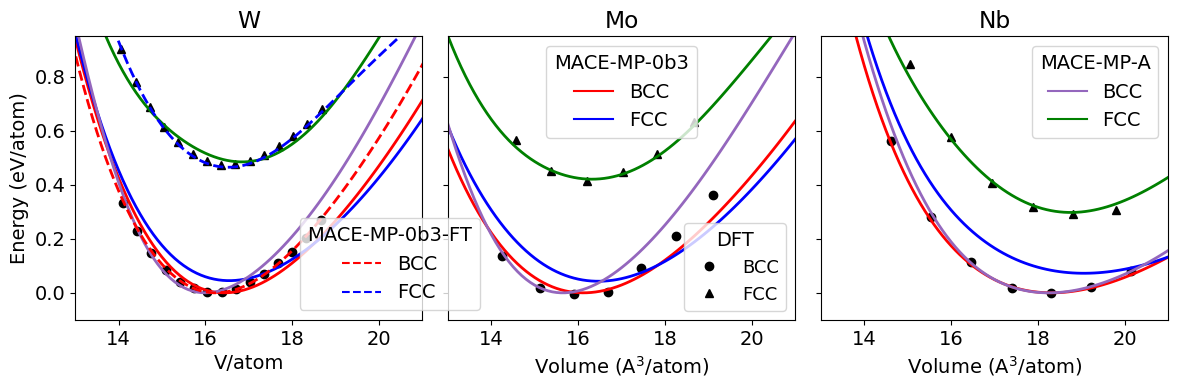

In [75]:
fig = plot_eos("mp-0b3-medium", "MACE-MP-0b3")

fig.savefig("figures/eos_W_Mo_Nb_medium_0b3_alex.pdf")
fig.savefig("figures/eos_W_Mo_Nb_medium_0b3_alex.svg")

## Point defects

In [76]:
vac_data = {}
for symbol in ["W", "Nb", "Mo"]:
    with open(f"results/vac_formation_energy_mp-0b3-medium_{symbol}.csv", "r") as f:
        vac_data[symbol] = float(f.readline())
vac_data
vac_data_alex = {}
for symbol in ["W", "Nb", "Mo"]:
    with open(f"results/vac_formation_energy_mace-mp-alex_{symbol}.csv", "r") as f:
        vac_data_alex[symbol] = float(f.readline())

In [77]:
df_vac = pd.read_csv("results/MACE-MP_vac_formation_energies.csv", index_col=0)
df_vac

,MACE-MP,MACE-MP-0-small,MACE-MP-0-medium,MACE-MP-0-large,DFT
symbol,,,,,
W,2.632,3.165,2.632,2.139,3.35
Mo,2.231,3.318,2.231,1.817,2.83
Nb,2.213,2.861,2.213,2.373,2.71


In [78]:
df_vac["MACE-MP-0b3-medium"] = vac_data
df_vac["MACE-MP-A"] = vac_data_alex
ft_data = {}
with open(f"results/vac_formation_energy_A13_MD_W.csv", "r") as f:
    ft_data["W"] = float(f.readline())

df_vac["MACE-MP-0b3-medium_ft"] = ft_data
df_vac

,MACE-MP,MACE-MP-0-small,MACE-MP-0-medium,MACE-MP-0-large,DFT,MACE-MP-0b3-medium,MACE-MP-A,MACE-MP-0b3-medium_ft
symbol,,,,,,,,
W,2.632,3.165,2.632,2.139,3.35,2.887,3.384,3.737
Mo,2.231,3.318,2.231,1.817,2.83,2.157,2.910,NaN
Nb,2.213,2.861,2.213,2.373,2.71,1.789,2.414,NaN


In [79]:
df_sia = pd.read_csv("results/MACE-MP_sia_formation_energies.csv", index_col=0)
sia_data = {}
for symbol in ["W", "Nb", "Mo"]:
    with open(f"results/SIA_formation_energy_mp-0b3-medium_{symbol}.csv", "r") as f:
        sia_data[symbol] = float(f.readline())
df_sia["MACE-MP-0b3-medium"] = sia_data
sia_data_alex = {}
for symbol in ["W", "Nb", "Mo"]:
    with open(f"results/SIA_formation_energy_mace-mp-alex_{symbol}.csv", "r") as f:
        sia_data_alex[symbol] = float(f.readline())

df_sia["MACE-MP-A"] = sia_data_alex
ft_data = {}
with open(f"results/SIA_formation_energy_A13_MD_W.csv", "r") as f:
    ft_data["W"] = float(f.readline())
df_sia["MACE-MP-0b3-medium_ft"] = ft_data

df_sia

,MACE-MP,MACE-MP-0-small,MACE-MP-0-medium,MACE-MP-0-large,DFT,MACE-MP-0b3-medium,MACE-MP-A,MACE-MP-0b3-medium_ft
symbol,,,,,,,,
W,5.287,6.167,5.287,6.827,10.180139,5.078,11.371,8.69
Mo,3.937,4.254,3.937,5.686,7.371824,3.770,7.923,NaN
Nb,3.734,3.416,3.734,5.516,3.953811,3.640,4.191,NaN


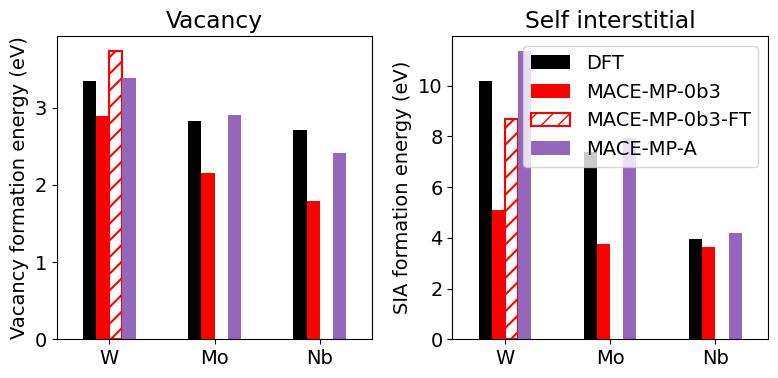

In [80]:
show_ft = True

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
plt.rcParams['font.size'] = 14
#axes[0] = df_vac.plot.bar(y=["DFT", "MACE-MP-0-small", "MACE-MP-0-medium", "MACE-MP-0-large"],rot=0, ax=axes[0], color=["C1", "C0", "C2", "C4"], legend=False)
if show_ft:
    axes[0] = df_vac.plot.bar(y=["DFT", "MACE-MP-0b3-medium", "MACE-MP-0b3-medium_ft", "MACE-MP-A"],
                            rot=0, ax=axes[0], color=["k", "r", "r", "C4"], legend=False)
else:
    axes[0] = df_vac.plot.bar(y=["DFT", "MACE-MP-0b3-medium"],
                            rot=0, ax=axes[0], color=["k", "r", "C2", "C4"], legend=False)
axes[0].set_ylabel("Vacancy formation energy (eV)")
axes[0].set_xlabel("")
#axes[0].legend(title="", labels=["DFT", "small", "medium", "large"])
axes[0].set_title("Vacancy")

if show_ft:
    df_sia.plot.bar(y=["DFT", "MACE-MP-0b3-medium", "MACE-MP-0b3-medium_ft", "MACE-MP-A"],
                    rot=0, ax=axes[1], color=["k", "r", "r", "C4"])
else:
    df_sia.plot.bar(y=["DFT", "MACE-MP-0b3-medium"],
                rot=0, ax=axes[1], color=["k", "r", "C2", "C4"])

if show_ft:
    for ax in axes:
        for i in [6]:
            color = ax.patches[i].get_facecolor()
            ax.patches[i].set_linewidth(1.5)
            ax.patches[i].set_hatch("//")
            ax.patches[i].set_hatch_linewidth(1.5)
            ax.patches[i].set_fill(None)
            ax.patches[i].set_edgecolor(color)    

axes[1].set_ylabel("SIA formation energy (eV)")
axes[1].set_xlabel("")
if show_ft:
    labels = ["DFT", "MACE-MP-0b3", "MACE-MP-0b3-FT", "MACE-MP-A"]
else:
    labels = ["DFT", "MACE-MP-0b3"]
axes[1].legend(title="", labels=labels)
axes[1].set_title("Self interstitial")
fig.tight_layout()
if show_ft:
    fig.savefig("figures/vac_SIA_W_Mo_Nb_medium_0b3_ft_alex.pdf")
    fig.savefig("figures/vac_SIA_W_Mo_Nb_medium_Ob3_ft_alex.svg")
else:
    fig.savefig("figures/vac_SIA_W_Mo_Nb_medium_0b3.pdf")
    fig.savefig("figures/vac_SIA_W_Mo_Nb_medium_Ob3.svg")

## Stacking faults

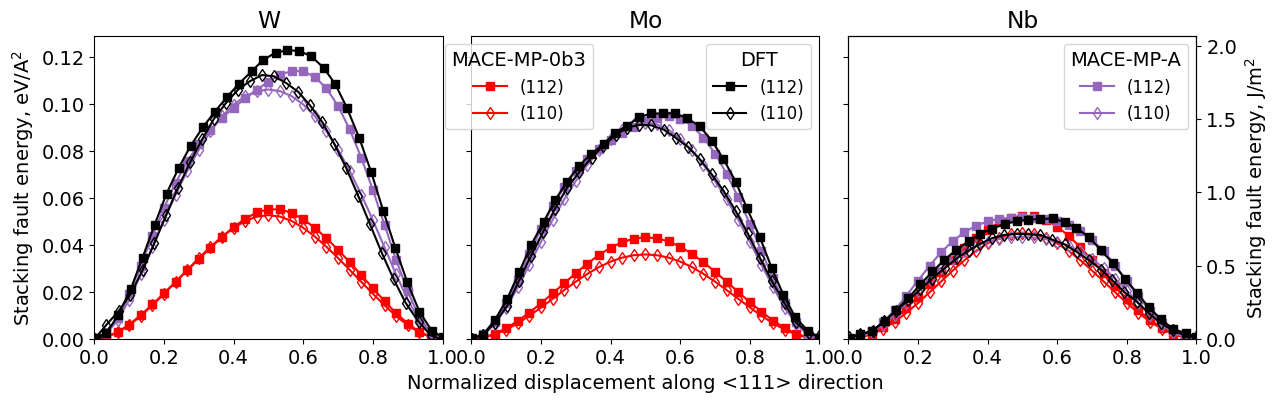

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

from ase.units import J, m

show_ft = False

fig, rows = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

labels = ["(112)", "(110)"]

#colors = {"small": "C0", "medium": "C2", "large": "C4"}

colors = {"small": "C0", "medium": "r", "large": "C4"}

potential = "mp-0b3-medium"
potential2 = "mace-mp-alex"
for ax, symbol in zip(rows, ["W", "Mo", "Nb"]):

    s, E = np.loadtxt(f"results/gamma_line_{potential}_screw_{symbol}_0.csv", unpack=True)
    mace_0 = ax.plot(s /s.max(), E[::-1] , "-s", color=colors[potential.split("-")[-1]], label=labels[0])

    s, E = np.loadtxt(f"results/gamma_line_{potential}_screw_{symbol}_1.csv", unpack=True)
    mace_1 = ax.plot(s /s.max(), E[::-1], "-d", markerfacecolor='none', color=colors[potential.split("-")[-1]], label=labels[1])

    s, E = np.loadtxt(f"results/gamma_line_{potential2}_screw_{symbol}_0.csv", unpack=True)
    mace_0_a = ax.plot(s /s.max(), E[::-1] , "-s", color="C4", label=labels[0])

    s, E = np.loadtxt(f"results/gamma_line_{potential2}_screw_{symbol}_1.csv", unpack=True)
    mace_1_a = ax.plot(s /s.max(), E[::-1], "-d", markerfacecolor='none', color="C4", label=labels[1])

    s, E = np.loadtxt(f"data/gamma_line_DFT_screw_{symbol}_0.csv", unpack=True, delimiter=',',)
    dft_0 = ax.plot(s /s.max(), E * J / m**2, "-s", color="k", label=labels[0])
    s, E = np.loadtxt(f"data/gamma_line_DFT_screw_{symbol}_1.csv", unpack=True, delimiter=',',)
    dft_1 = ax.plot(s /s.max(), E * J / m**2, "-d", markerfacecolor='none', color="k", label=labels[1])

    ax.set_title(symbol)

if show_ft:
    potential = "A13_MD"
    s, E = np.loadtxt(f"results/gamma_line_{potential}_screw_W_0.csv", unpack=True)
    mace_ft_0 = rows[0].plot(s / s.max(), E[::-1] , "--s", color="b", label=labels[0])

    s, E = np.loadtxt(f"results/gamma_line_{potential}_screw_W_1.csv", unpack=True)
    mace_ft_1 = rows[0].plot(s / s.max(), E[::-1], "--d", markerfacecolor='none', color="b", label=labels[1])

    rows[0].legend(loc="lower center", handles=[mace_ft_0[0], mace_ft_1[0]], title="MACE-MP-0b3-FT", fontsize=12)
fig.tight_layout()
first_legend = rows[1].legend(loc="upper left", handles=[mace_0[0], mace_1[0]], #title=potential.split("-")[:-1], 
                              title="MACE-MP-0b3", fontsize=12, bbox_to_anchor=(-0.1, 1.0))
rows[1].legend(loc="upper right", handles=[dft_0[0], dft_1[0]], title="DFT", fontsize=12, bbox_to_anchor=(1.0, 1.0))
rows[1].add_artist(first_legend)
rows[0].set_xlim(0, 1)
rows[0].set_ylim(0, rows[0].get_ylim()[1])

rows[0].set_ylabel("Stacking fault energy, eV/A$^2$")
twin_ax = rows[2].twinx()
twin_ax.set_ylim(np.array(rows[0].get_ylim()) / J * m**2)
twin_ax.set_ylabel("Stacking fault energy, J/m$^2$")


rows[1].set_xlabel("Normalized displacement along <111> direction")
rows[2].legend(handles=[mace_0_a[0], mace_1_a[0]], title="MACE-MP-A", fontsize=12)

if show_ft:
    fig.savefig("figures/stacking_fault_energy_W_Mo_Nb_medium_0b3_ft.pdf")
    fig.savefig("figures/stacking_fault_energy_W_Mo_Nb_medium_0b3_ft.svg")
else:
    fig.savefig("figures/stacking_fault_energy_W_Mo_Nb_medium_0b3_alex.pdf")
    fig.savefig("figures/stacking_fault_energy_W_Mo_Nb_medium_0b3_alex.svg")

## Screw dislocations

In [82]:
def add_core_plot(ax, i, rect,
                  pure_glide_averaged_images,
                  QM_MM_bulk,
                  alat=3.17,
                  legend=False, title="",
                  core_size=75, spine_color="black",
                  spine_lw=1.0, core_lw=1.0,
                  legend_bbox=(0.375, 1.0, 0.5, 0.5),
                  xlim=(-1.9, 4.3)):

    core1 = ax.inset_axes(rect, transform=ax.transAxes)

    core1.set_xticks(())
    core1.set_yticks(())

    image = pure_glide_averaged_images[i]
    sd.plot_vitek(image, QM_MM_bulk, alat=alat, plot_axes=core1, xyscale=3)
    x, y, _ = QM_MM_bulk.positions.T
    core1.set_xlim(x.mean() + xlim[0], x.mean() + xlim[1])
    core1.set_ylim((y.mean() - 4.0, y.mean() + 2.2))

    core1.set_aspect("equal")

    core1.set_title(title, fontsize=12)
    if legend:
        core1.legend(bbox_to_anchor=legend_bbox,
                     fontsize=12, loc="lower center")

    for axis in ['top','bottom','left','right']:
        core1.spines[axis].set_linewidth(spine_lw)
        core1.spines[axis].set_color(spine_color)


    # core1.set_axis_off()

    return core1

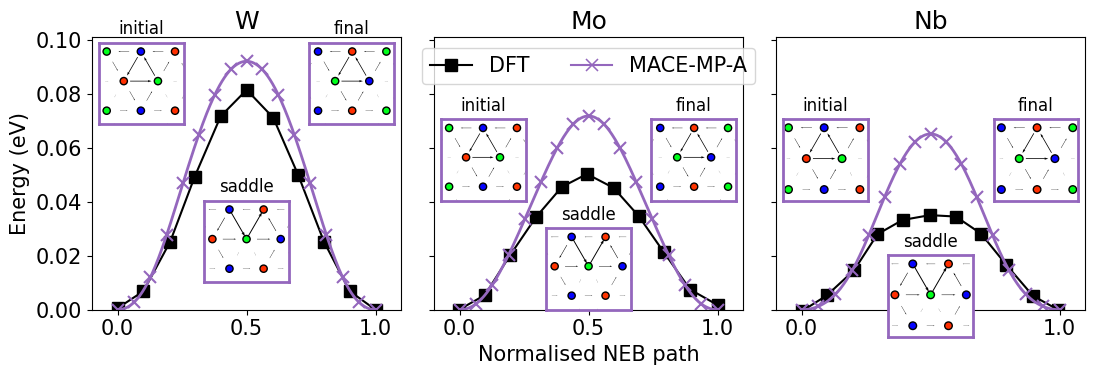

In [83]:
import matplotlib.pyplot as plt
import matscipy.dislocation as sd
plt.rcParams['font.size'] = 15
from ase.io import read
import sys
sys.path.append("scripts")
from plot_neb_mpl import plot_neb
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


colors = {"small": "C0", "mp-0b3-medium": "r", "mace-mp-alex": "C4", "MPtrj": "C5"}

fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharex=True, sharey=True)

for symbol, ax in zip(["W", "Mo", "Nb"], axes):
    dft = pd.read_csv(f"data/screw_dislocation_glide_DFT_{symbol}.csv")
    ax.plot(dft.s, dft.E, "-s", c="k", ms=8, label="DFT")
    alat = pivot["alat"]['mp-alex'][symbol]
    for potential in ["mace-mp-alex"]:
        images = read(f"results/cyl_{symbol}_screw_glide_neb_{potential}.xyz", index=":")
        bulk = read(f"results/cyl_bulk_{symbol}_screw_glide_neb_{potential}.xyz")
        plot_neb(images, label="MACE-MP-A", ax=ax, color=colors[potential], ms=8, linestyle="-", marker="x")
        
        if symbol == "W":
            rect = (0.01, 0.68, 0.3, 0.3)
        else:
            rect = (0.01, 0.4, 0.3, 0.3)
        i = 0
        first_pure_core = add_core_plot(ax, i, rect,
                                        images,
                                        bulk, title="initial",
                                        alat=alat,
                                        xlim=(-4.475, 1.95),
                                        spine_color="C4",
                                        spine_lw=2.0, core_lw=2.0)

        #add_lines_to_core(ax, first_pure_core, s_W[0], E_W[0],
        #                orientation="bottom",
        #                color="C0", x_shift=0.07)

        if symbol == "W":
            rect = (0.35, 0.1, 0.3, 0.3)
        elif symbol == "Nb":
            rect = (0.35, -0.1, 0.3, 0.3)
        else:
            rect = (0.35, 0.0, 0.3, 0.3)
        i = 8
        second_pure_core = add_core_plot(ax, i, rect,
                                         images,
                                         bulk, title="saddle",
                                         alat=alat,
                                         xlim=(-3.2, 3.2),
                                         spine_color="C4",
                                         spine_lw=2.0, core_lw=2.0)

        #add_lines_to_core(ax, second_pure_core , s_W[3], E_W[3],
        #                orientation="top",
        #                color="C0", x_shift=0.065)

        if symbol == "W":
            rect = (0.69, 0.68, 0.3, 0.3)
        else:
            rect = (0.69, 0.4, 0.3, 0.3)
        i = -1
        last_pure_core = add_core_plot(ax, i, rect,
                                       images,
                                       bulk,
                                       alat=alat, title="final",
                                       spine_color="C4",
                                       xlim=(-1.95, 4.475),
                                       spine_lw=2.0, core_lw=2.0,
                                       legend=False,
                                       legend_bbox=(0.20, 0.95, 0.5, 0.5))

        #add_lines_to_core(ax, last_pure_core , s_W[-1], E_W[-1],
        #                orientation="bottom",
        #                color="C0", x_shift=0.07)
        ax.set_title(symbol)
        ax.set_ylabel('')

fig.tight_layout()
axes[0].legend_.remove()
axes[2].legend_.remove()
axes[1].legend(loc="upper center", ncol=2)   
axes[0].set_xlim(-0.1, 1.1)
axes[0].set_ylim(0, 0.101)
axes[0].set_ylabel("Energy (eV)")

for ax in axes[::2]:
    ax.set_xlabel("")


fig.savefig("figures/screw_dislocation_glide_W_Mo_Nb_alex.pdf")
fig.savefig("figures/screw_dislocation_glide_W_Mo_Nb_alex.svg")

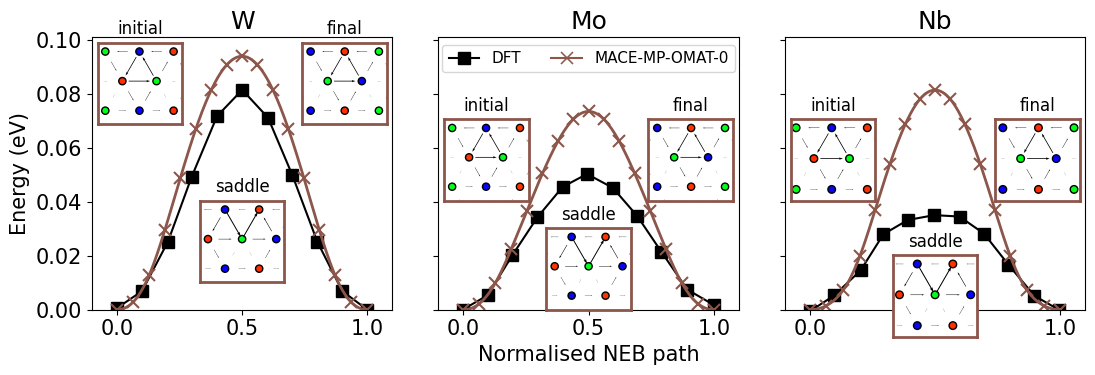

In [87]:
import matplotlib.pyplot as plt
import matscipy.dislocation as sd
plt.rcParams['font.size'] = 15
from ase.io import read
import sys
sys.path.append("scripts")
from plot_neb_mpl import plot_neb
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


colors = {"small": "C0", "mp-0b3-medium": "r", "mace-mp-alex": "C4", "omat-medium": "C5"}

fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharex=True, sharey=True)

for symbol, ax in zip(["W", "Mo", "Nb"], axes):
    dft = pd.read_csv(f"data/screw_dislocation_glide_DFT_{symbol}.csv")
    ax.plot(dft.s, dft.E, "-s", c="k", ms=8, label="DFT")
    alat = pivot["alat"]['mp-alex'][symbol]
    for potential in ["omat-medium"]:
        images = read(f"results/cyl_{symbol}_screw_glide_neb_{potential}.xyz", index=":")
        bulk = read(f"results/cyl_bulk_{symbol}_screw_glide_neb_{potential}.xyz")
        plot_neb(images, label="MACE-MP-OMAT-0", ax=ax, color=colors[potential], ms=8, linestyle="-", marker="x")
        
        if symbol == "W":
            rect = (0.01, 0.68, 0.3, 0.3)
        else:
            rect = (0.01, 0.4, 0.3, 0.3)
        i = 0
        first_pure_core = add_core_plot(ax, i, rect,
                                        images,
                                        bulk, title="initial",
                                        alat=alat,
                                        xlim=(-4.475, 1.95),
                                        spine_color="C5",
                                        spine_lw=2.0, core_lw=2.0)

        #add_lines_to_core(ax, first_pure_core, s_W[0], E_W[0],
        #                orientation="bottom",
        #                color="C0", x_shift=0.07)

        if symbol == "W":
            rect = (0.35, 0.1, 0.3, 0.3)
        elif symbol == "Nb":
            rect = (0.35, -0.1, 0.3, 0.3)
        else:
            rect = (0.35, 0.0, 0.3, 0.3)
        i = 8
        second_pure_core = add_core_plot(ax, i, rect,
                                         images,
                                         bulk, title="saddle",
                                         alat=alat,
                                         xlim=(-3.2, 3.2),
                                         spine_color="C5",
                                         spine_lw=2.0, core_lw=2.0)

        #add_lines_to_core(ax, second_pure_core , s_W[3], E_W[3],
        #                orientation="top",
        #                color="C0", x_shift=0.065)

        if symbol == "W":
            rect = (0.69, 0.68, 0.3, 0.3)
        else:
            rect = (0.69, 0.4, 0.3, 0.3)
        i = -1
        last_pure_core = add_core_plot(ax, i, rect,
                                       images,
                                       bulk,
                                       alat=alat, title="final",
                                       spine_color="C5",
                                       xlim=(-1.95, 4.475),
                                       spine_lw=2.0, core_lw=2.0,
                                       legend=False,
                                       legend_bbox=(0.20, 0.95, 0.5, 0.5))

        #add_lines_to_core(ax, last_pure_core , s_W[-1], E_W[-1],
        #                orientation="bottom",
        #                color="C0", x_shift=0.07)
        ax.set_title(symbol)
        ax.set_ylabel('')

fig.tight_layout()
axes[0].legend_.remove()
axes[2].legend_.remove()
axes[1].legend(loc="upper center", ncol=2, fontsize=11)   
axes[0].set_xlim(-0.1, 1.1)
axes[0].set_ylim(0, 0.101)
axes[0].set_ylabel("Energy (eV)")

for ax in axes[::2]:
    ax.set_xlabel("")


fig.savefig("figures/screw_dislocation_glide_W_Mo_Nb_omat.pdf")
fig.savefig("figures/screw_dislocation_glide_W_Mo_Nb_omat.svg")

# Edge dislocation glide

/home/petr/gits/mace_bcc_test/scripts/plot_neb_mpl.py:25: FutureWarning: Please import NEB from ase.mep, not ase.neb.
  s, E, _ = NEB(images).integrate_forces()


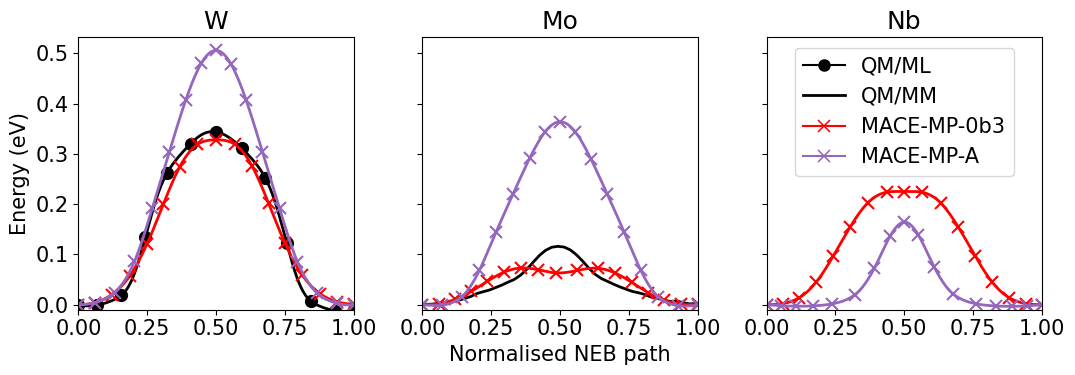

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
import sys
sys.path.append("scripts")
from plot_neb_mpl import plot_neb
colors = {"small": "C0", "mp-0b3-medium": "r", "large": "C4", "MPtrj": "C5"}

fig, axes = plt.subplots(1, 3, figsize=(11, 4), sharex=True, sharey=True)

axes[2].plot([], [], label="QM/ML", color="k", ms=8, linestyle="-", marker="o", zorder=10)
axes[2].plot([], [], "-", c="k", label="QM/MM", lw=2, zorder=0)

for symbol, ax in zip(["W", "Mo", "Nb"], axes):
    #ax.plot(dft_results_junction[symbol][0], dft_results[symbol][1], "-s", c="C1", ms=8, label="DFT")
    if symbol == "W":
        images = read(f"data/junction_glide_neb_QMML.xyz", index=":")
        plot_neb(images, label="QM/ML", ax=ax, color="k", ms=8, linestyle="-", marker="o", forces_only=True, zorder=0)
    if symbol == "Mo":
        s, E = np.loadtxt(f"data/junction_glide_neb_QMMM_Mo.csv", unpack=True, delimiter=',')
        ax.plot(s, E, "-", c="k", label="QM/MM", lw=2, zorder=0)

    #for potential in ["small", "medium", "large"]:#, "MPtrj"]:
    potential = "mp-0b3-medium"
    images = read(f"results/cyl_{symbol}_junction_glide_neb_{potential}.xyz", index=":",)
    plot_neb(images, label="MACE-MP-0b3", ax=ax, color=colors[potential], ms=8, linestyle="-", marker="x")

    potential2 = "mace-mp-alex"
    images = read(f"results/cyl_{symbol}_junction_glide_neb_{potential2}.xyz", index=":",)
    plot_neb(images, label="MACE-MP-A", ax=ax, color="C4", ms=8, linestyle="-", marker="x")


    ax.set_title(symbol)
    ax.set_ylabel('')

axes[0].legend_.remove()
axes[1].legend_.remove()
axes[0].set_xlim(0, 1)
axes[0].set_ylim(-0.01, axes[0].get_ylim()[1])
axes[0].set_ylabel("Energy (eV)")
axes[2].legend(loc="upper center", ncol=1)# bbox_to_anchor=(-0.4, 1.0))   
for ax in axes[::2]:
    ax.set_xlabel("")


fig.tight_layout()

fig.savefig("figures/junction_dislocation_glide_W_Mo_Nb_medium_0b3_alex.pdf")
fig.savefig("figures/junction_dislocation_glide_W_Mo_Nb_medium_0b3_alex.svg")